Este código tem a finalidade de realizar uma análise exploratória de dados para tratamento, manipulação e visualização desses dados para comparação e também identificar alguns padrões presentes dentro desta base de dados.

Primeiramente vamos importar as bibliotecas, realizar o upload do arquivo e visualizar como ele está organizado.

In [3]:
# Importe as bibliotecas
import pandas as pd 
from google.colab import files
import io
import matplotlib.pyplot as plt

In [4]:
# Faça upload do arquivo csv
uploaded=files.upload()

Saving wine.csv to wine.csv


In [5]:
# Leia os dados do arquivo csv com a biblioteca pandas
#dados= pd.read_csv(io.BytesIO(uploaded['wine.csv']), sep=',')
dados= pd.read_csv('wine.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
# Visualize as primeiras linhas do csv e as colunas do csv
dados.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,rp,code
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,32.0,87.0,NaN,"Held back nearly five years, this Cab still ha...",2.718750,1.0
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,17.0,85.0,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",5.000000,1.0
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90.0,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f...",NaN,1.0
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,18.0,86.0,NaN,The nose is rather neutral save for distant ar...,4.777778,1.0
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,21.0,85.0,NaN,"This intriguing blend of Falanghina, Biancolel...",4.047619,NaN


Logo após a importação e visualização vamos analisar e manipular algumas colunas desta base de dados para melhorar os resultados dos calculos estatísticos que serão feitos posteriormente.

In [7]:
# Vamos selecionar as colunas que possuem dados
dados= dados.iloc[0:,0:11]

In [8]:
# Verifique os dados selecionados
dados.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,$32,87.0,NaN,"Held back nearly five years, this Cab still ha..."
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15%,$17,85.0,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful..."
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90.0,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f..."
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5%,$18,86.0,NaN,The nose is rather neutral save for distant ar...
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5%,$21,85.0,NaN,"This intriguing blend of Falanghina, Biancolel..."


In [9]:
# Verifique o tipo de dados das colunas alcohol, price e rating
print(dados.alcohol.dtype)
print(dados['price'].dtype)
print(dados.rating.dtype)

object
object
float64


In [10]:
# Precisamos converter as colunas alcohol e price para float
alcool= dados['alcohol'].str.replace('%',"")
dados['alcohol']= alcool.astype(float)

preco= dados["price"].str.replace('$',"")
dados['price']= preco.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [11]:
# Visualize a tabela resultante
dados.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,32.0,87.0,NaN,"Held back nearly five years, this Cab still ha..."
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,17.0,85.0,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful..."
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90.0,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f..."
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,18.0,86.0,NaN,The nose is rather neutral save for distant ar...
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,21.0,85.0,NaN,"This intriguing blend of Falanghina, Biancolel..."


In [12]:
# Criar um novo atributo na tabela
dados['rp']=dados.rating/dados.price

In [13]:
# Verificar a tabela produzida
dados.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,rp
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,32.0,87.0,NaN,"Held back nearly five years, this Cab still ha...",2.718750
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,17.0,85.0,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",5.000000
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90.0,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f...",NaN
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,18.0,86.0,NaN,The nose is rather neutral save for distant ar...,4.777778
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,21.0,85.0,NaN,"This intriguing blend of Falanghina, Biancolel...",4.047619


In [14]:
#Examinar os vinhos da categoria vermelha
# Criar uma nova tabela apenas com os vinho vermelhos
vermelho=dados[dados['category']=="Red"]

In [15]:
#Visualizar nova tabela
vermelho.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,rp
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,32.0,87.0,NaN,"Held back nearly five years, this Cab still ha...",2.718750
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,17.0,85.0,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",5.000000
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90.0,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f...",NaN
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,18.0,86.0,NaN,The nose is rather neutral save for distant ar...,4.777778
5,Las Positas 2011 Estate Barbera (Livermore Val...,Las Positas,Red,Estate,Barbera,"Livermore Valley, Central Coast, California, US",15.1,40.0,89.0,Virginie Boone,"This is a hefty Barbera, replete with dark, br...",2.225000


In [16]:
# Verificar número de elementos da tabela
vermelho.shape

(65, 12)

In [17]:
# Verificar número de elementos da tabela
dados.shape

(227385, 12)

Por fim vamos calcular algumas estatísticas básicas e logo após criar um gráfico para melhorar a visualização dos padrões dos dados.

In [18]:
# Importe  a biblioteca numpy porque utilizaremos np.nan
import numpy as np

In [19]:
# Criando uma nova coluna para armazenar o código que representa o tipo de vinho
dados['code']=np.nan
dados.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,rp,code
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,32.0,87.0,NaN,"Held back nearly five years, this Cab still ha...",2.718750,NaN
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,17.0,85.0,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",5.000000,NaN
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90.0,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f...",NaN,NaN
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,18.0,86.0,NaN,The nose is rather neutral save for distant ar...,4.777778,NaN
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,21.0,85.0,NaN,"This intriguing blend of Falanghina, Biancolel...",4.047619,NaN


In [20]:
# Vamos atribuir código 1 aos vinhos do tipo Red
dados.loc[dados['category']=='Red','code']=1

In [21]:
dados.head()

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,rp,code
0,J. Lohr 2000 Hilltop Vineyard Cabernet Sauvign...,J. Lohr,Red,Hilltop Vineyard,Cabernet Sauvignon,"Paso Robles, Central Coast, California, US",NaN,32.0,87.0,NaN,"Held back nearly five years, this Cab still ha...",2.718750,1.0
1,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,17.0,85.0,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",5.000000,1.0
2,Quinta do Portal 1999 Quinta do Portal Reserva...,Quinta do Portal,Red,Quinta do Portal Reserva,"Red Blends, Red Blends","Douro, Portugal",NaN,NaN,90.0,Roger Voss,"Smoky, meaty aromas lead into perfumed fruit f...",NaN,1.0
3,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,18.0,86.0,NaN,The nose is rather neutral save for distant ar...,4.777778,1.0
4,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,21.0,85.0,NaN,"This intriguing blend of Falanghina, Biancolel...",4.047619,NaN


In [22]:
# Verificar o nome dos revisores de vinho
pd.unique(dados['reviewer'])

array([nan, 'Michael Schachner', 'Roger Voss', 'Virginie Boone',
       'Christina Pickard', 'Alexander Peartree', 'Jeff Jenssen',
       'Matt Kettmann', 'Lauren Buzzeo', 'Kerin O’Keefe',
       'Sean P. Sullivan', 'Joe Czerwinski', 'Jim Gordon',
       'Anne Krebiehl\xa0MW', 'Susan Kostrzewa', 'Fiona Adams',
       'Paul Gregutt', 'Anna Lee C. Iijima'], dtype=object)

In [23]:
# verificar tipo de vinho
pd.unique(dados['category'])

array(['Red', 'White', 'Sparkling', 'Dessert', 'Port/Sherry', 'Rose', nan],
      dtype=object)

In [24]:
# Contar quantos vinhos temos de cada categoria
dados['category'].value_counts(ascending=False)

Red            65
White          25
Sparkling       5
Dessert         3
Port/Sherry     1
Rose            1
Name: category, dtype: int64

In [25]:
# Verifique e exiba os nome das colunas da tabela
for col in dados.columns:
  print(col) 

wine
winery
category
designation
varietal
appellation
alcohol
price
rating
reviewer
review
rp
code


In [26]:
dados.columns

Index(['wine', 'winery', 'category', 'designation', 'varietal', 'appellation',
       'alcohol', 'price', 'rating', 'reviewer', 'review', 'rp', 'code'],
      dtype='object')

In [27]:
# Estatísticas descritivas para toda a nossa tabela
stats=dados.describe()

In [28]:
stats

,alcohol,price,rating,rp,code
count,87.000000,88.000000,100.000000,88.000000,65.0
mean,13.635632,34.284091,88.770000,4.042846,1.0
std,1.242651,34.554621,3.308559,2.590850,0.0
min,10.000000,5.000000,80.000000,0.324138,1.0
25%,13.000000,15.750000,86.000000,2.105952,1.0
50%,13.500000,24.000000,89.000000,3.695833,1.0
75%,14.200000,44.250000,91.250000,5.588542,1.0
max,20.000000,290.000000,98.000000,16.800000,1.0


In [29]:
# Calcular teor médio de alcool
np.mean(dados['alcohol'])

13.635632183908045

In [30]:
print(np.min(dados['alcohol']))
print(np.std(dados['alcohol']))
print(np.max(dados['alcohol']))

10.0
1.2354883637231193
20.0


In [31]:
# Estatística descritiva por tipo de vinho
dados.groupby(['category']).describe()

alcohol                                                       \
              count       mean       std   min    25%   50%    75%   max   
category                                                                   
Dessert         2.0  10.500000  0.707107  10.0  10.25  10.5  10.75  11.0   
Port/Sherry     1.0  20.000000       NaN  20.0  20.00  20.0  20.00  20.0   
Red            55.0  13.983636  0.827482  11.0  13.50  14.0  14.50  15.6   
Rose            1.0  12.500000       NaN  12.5  12.50  12.5  12.50  12.5   
Sparkling       5.0  12.140000  0.472229  11.5  12.00  12.0  12.50  12.7   
White          23.0  13.173913  0.681721  12.0  12.50  13.1  13.70  14.3   

            price             ...        rp             code                 \
            count       mean  ...       75%        max count mean  std  min   
category                      ...                                             
Dessert       1.0  55.000000  ...  1.727273   1.727273   0.0  NaN  NaN  NaN   
Port/Sherry   1.0  51.000000  ...  1.745098   1.745098   0.0  NaN  NaN  NaN   
Red          60.0  38.366667  ...  4.747076  10.500000  65.0  1.0  0.0  1.0   
Rose          1.0  15.000000  ...  5.800000   5.800000   0.0  NaN  NaN  NaN   
Sparkling     3.0  35.000000  ...  3.621345   4.631579   0.0  NaN  NaN  NaN   
White        22.0  22.227273  ...  6.435440  16.800000   0.0  NaN  NaN  NaN   

                                 
             25%  50%  75%  max  
category                         
Dessert      NaN  NaN  NaN  NaN  
Port/Sherry  NaN  NaN  NaN  NaN  
Red          1.0  1.0  1.0  1.0  
Rose         NaN  NaN  NaN  NaN  
Sparkling    NaN  NaN  NaN  NaN  
White        NaN  NaN  NaN  NaN  

[6 rows x 40 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


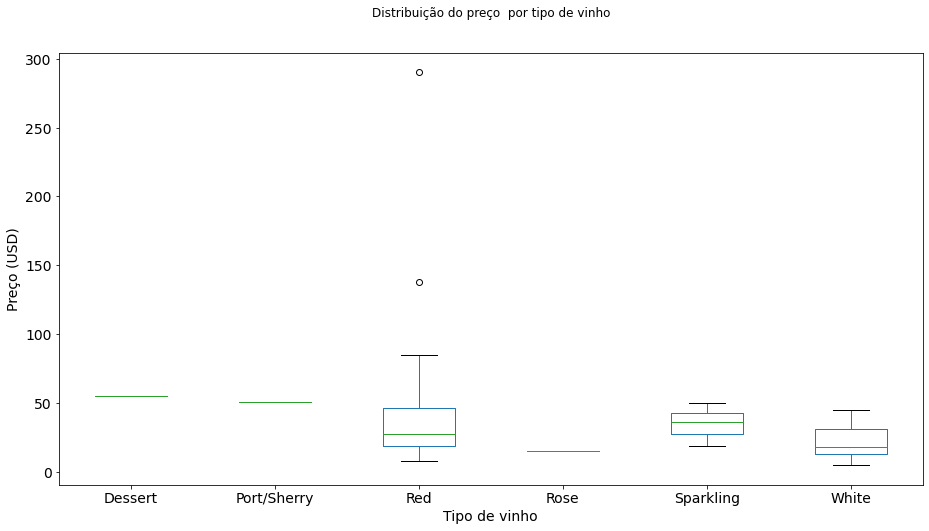

In [32]:
# Criar um boxplot do preço por tipo de vinho
dados.boxplot(column='price', by='category', figsize=(15,8), grid = False, fontsize=14)
plt.title('')
plt.suptitle('Distribuição do preço  por tipo de vinho')
plt.ylabel('Preço (USD)', fontsize=14)
plt.xlabel('Tipo de vinho', fontsize=14)
plt.show()
